# Импорт

In [1]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


sys.path.append("../Project")
from Classes.Ant import Ant
from Classes.TrackOfWalk import TrackOfWalk

# Общие переменные

In [7]:
field_size = 12

In [8]:
feromon_map = np.random.rand(field_size, field_size)
feromon_map = (feromon_map + feromon_map.T) / 2 - 100 * np.eye(field_size)
distance_map = np.random.rand(field_size, field_size)
distance_map = (distance_map + distance_map.T) / 2 - 100 * np.eye(field_size)

In [9]:
print(feromon_map)

[[-9.97191381e+01  3.55726671e-01  3.38935255e-01  2.64179291e-01
   1.88716471e-01  5.08665146e-01  6.50061896e-01  5.42313451e-01
   4.75085515e-01  3.79587653e-01  2.76042351e-01  5.17584104e-01]
 [ 3.55726671e-01 -9.98727087e+01  8.65629751e-01  6.28487942e-01
   6.87342248e-01  7.94712360e-01  2.78538689e-01  9.26787107e-01
   8.51879719e-01  6.41689919e-01  8.50132210e-01  5.57909383e-01]
 [ 3.38935255e-01  8.65629751e-01 -9.91822189e+01  5.09788721e-01
   7.71303415e-01  2.27080733e-01  3.95438966e-01  4.01579554e-01
   1.14648436e-01  9.00100718e-01  7.66399458e-02  5.44274290e-01]
 [ 2.64179291e-01  6.28487942e-01  5.09788721e-01 -9.97279831e+01
   4.61523046e-01  4.06710127e-01  7.96443726e-01  4.90131642e-01
   8.91162631e-02  7.03082318e-01  2.42633707e-01  6.86470758e-01]
 [ 1.88716471e-01  6.87342248e-01  7.71303415e-01  4.61523046e-01
  -9.90271679e+01  2.24805098e-01  4.69050273e-01  5.78628418e-01
   6.85681444e-01  2.37100558e-01  6.17067899e-01  4.04677803e-01]
 [ 5.

In [10]:
print(distance_map)

[[-99.74507957   0.39585958   0.2374875    0.68717277   0.19816557
    0.8118241    0.27717939   0.30571805   0.83660374   0.53540827
    0.297896     0.44279839]
 [  0.39585958 -99.52130793   0.7933503    0.56614827   0.31254727
    0.53900336   0.40534832   0.24932819   0.23173825   0.63132923
    0.53506353   0.24138548]
 [  0.2374875    0.7933503  -99.35147106   0.48937677   0.36862849
    0.27666111   0.52481233   0.38798742   0.65101664   0.30408014
    0.41498288   0.30744884]
 [  0.68717277   0.56614827   0.48937677 -99.11064344   0.65410513
    0.42429074   0.41929606   0.21077001   0.47585973   0.17533781
    0.46451698   0.38008334]
 [  0.19816557   0.31254727   0.36862849   0.65410513 -99.90371257
    0.20552693   0.74259306   0.56439537   0.43352507   0.55673143
    0.54832544   0.32438642]
 [  0.8118241    0.53900336   0.27666111   0.42429074   0.20552693
  -99.21553872   0.86727086   0.71114579   0.59903268   0.39506774
    0.80405561   0.40465422]
 [  0.27717939   0.405

In [11]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, field_size))

In [12]:
def random_experement(ant: Ant, 
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray,
               num_of_iteration: int):
    for _ in range(num_of_iteration):
        track = ant.walk(pos=[np.random.randint(0, field_size), 
                              np.random.randint(0, field_size)], 
                         distance_matrix=distance_map, 
                         feromon_matrix=feromon_map)
        feromon_map = feromon_map_updater.update(track=track, 
                                                 feromon_matrix=feromon_map)
    return feromon_map

In [13]:
def experement(ant: Ant,
               pos: iter,
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray,
               num_of_iteration: int):
    for _ in range(num_of_iteration):
        track = ant.walk(pos=pos, 
                         distance_matrix=distance_map, 
                         feromon_matrix=feromon_map)
        feromon_map = feromon_map_updater.update(track=track, 
                                                 feromon_matrix=feromon_map)
    return feromon_map

In [14]:
ants_collection = [[Ant(walk_distance=field_size//3, a=1, b=2) for _ in range(n*2)] for n in range(1, 8)]
feromon_map_updater = TrackOfWalk(feromon_volume=field_size*3, feromon_erosion_speed=0.7)


# Опыт

In [27]:
results = list()
for ants in ants_collection:
    time_map = feromon_map
    for ant in ants:
        time_map = random_experement(ant=ant, 
                                     feromon_map_updater=feromon_map_updater, 
                                     feromon_map=time_map, 
                                     distance_map=distance_map, 
                                     num_of_iteration=20)
    results.append(time_map)

In [25]:
results

[array([[ 7.50929468e-20,  5.84524650e-26,  5.56933251e-26,
          4.34095388e-26,  3.10096031e-26, -7.57585512e-23,
          1.06817181e-25,  8.91121206e-26,  1.95520088e+01,
          6.23732652e-26,  4.53588589e-26,  6.70463827e+00],
        [ 5.84524650e-26, -2.53237325e-21, -1.32073922e-21,
         -1.70490918e-05,  1.12943032e-25, -7.72593470e-23,
          4.57690533e-26,  6.80254522e-01,  1.39979578e-25,
          4.45199810e-26,  5.19705348e-01,  9.16748204e-26],
        [ 5.56933251e-26, -1.32073922e-21, -1.93077665e-17,
          8.37677064e-26, -6.89430412e-18,  3.73135602e-26,
          6.49779289e-26,  6.59869409e-26,  1.88388564e-26,
          1.47903180e-25,  1.25933592e-26,  8.94343226e-26],
        [ 4.34095388e-26, -1.70490918e-05,  8.37677064e-26,
         -4.77374571e-05,  7.58367642e-26,  6.68299888e-26,
          1.30870420e-25,  8.05376852e-26,  1.46434487e-26,
          1.15529416e-25,  3.98692014e-26,  1.12799830e-25],
        [ 3.10096031e-26,  1.1294303

[(1, 11, 12.363096985727942), (4, 11, 17.846749779246277)]

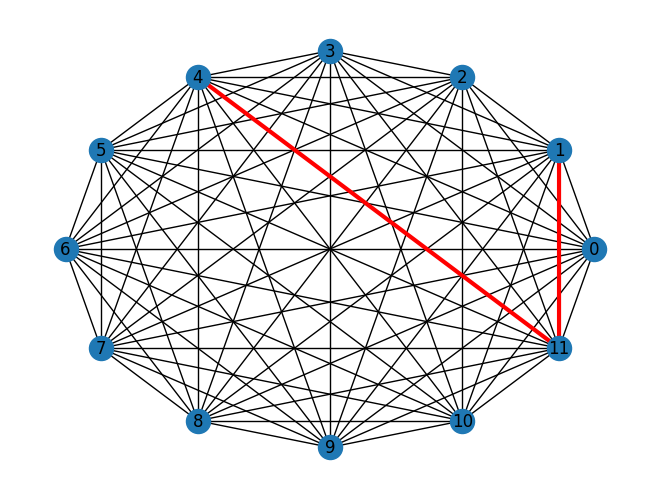

In [29]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[0][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K1 = nx.Graph()

for start, end, length in edges:
    K1.add_edge(start, end, length=length)


nx.draw_circular(K1, with_labels = True)
nx.draw_networkx_edges(K1, nx.circular_layout(K1), edgelist=edges_res, edge_color='r', arrows=True, width=3)
edges_res

[(0, 6, -3.330954496122322e-09),
 (0, 11, -6.8670982355242136e-18),
 (1, 2, -3.3387195169354538e-18),
 (4, 7, -1.8123757111880255e-23),
 (4, 10, -4.6035187598950275e-20),
 (5, 6, -1.2069451953386171e-25),
 (5, 10, -1.4597384629820955e-25),
 (6, 11, -1.5352604045594714e-22),
 (7, 8, -5.4820926531300016e-21)]

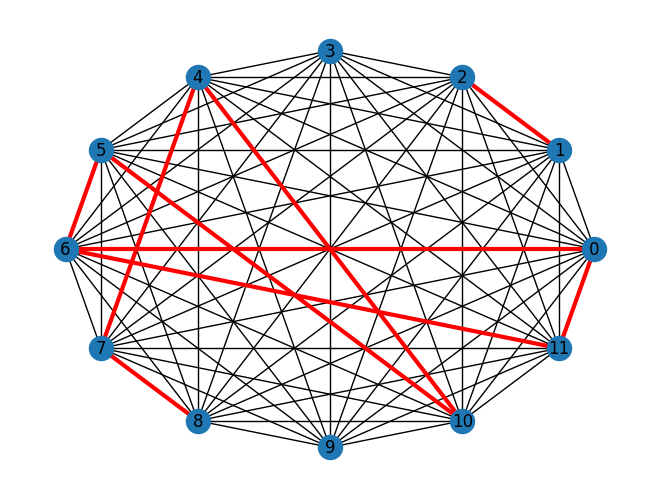

In [31]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[1][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K2 = nx.Graph()

for start, end, length in edges:
    K2.add_edge(start, end, length=length)


nx.draw_circular(K2, with_labels = True)
nx.draw_networkx_edges(K2, nx.circular_layout(K2), edgelist=edges_res, edge_color='r', arrows=True, width=3)
edges_res

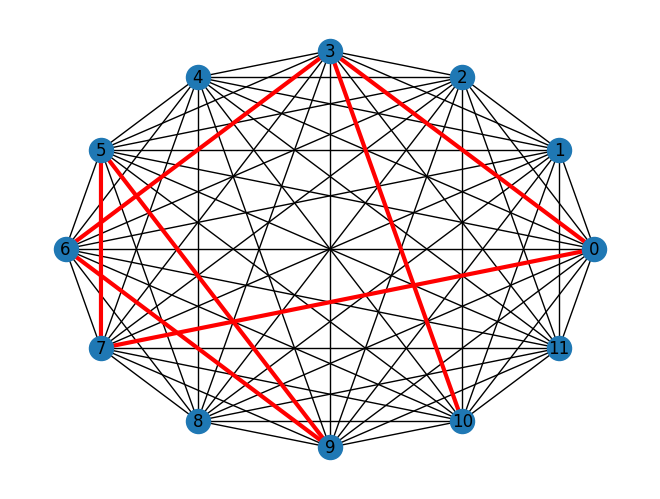

In [32]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[2][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K3 = nx.Graph()

for start, end, length in edges:
    K3.add_edge(start, end, length=length)


nx.draw_circular(K3, with_labels = True)
nx.draw_networkx_edges(K3, nx.circular_layout(K3), edgelist=edges_res, edge_color='r', arrows=True, width=3)


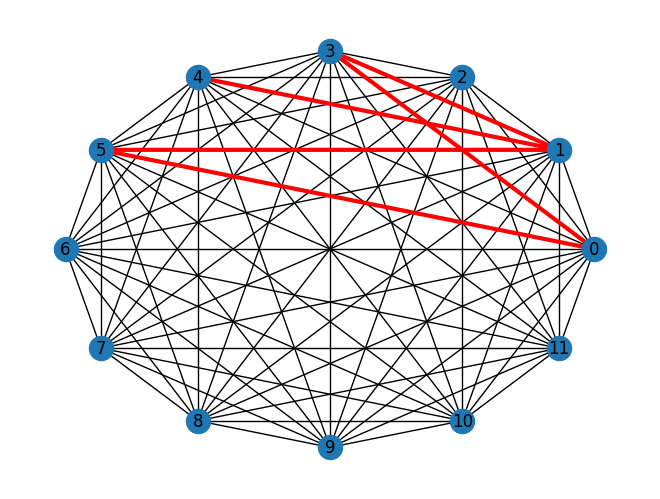

In [14]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[3][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K4 = nx.Graph()

for start, end, length in edges:
    K4.add_edge(start, end, length=length,color='r',weight=2)


nx.draw_circular(K4, with_labels = True)
nx.draw_networkx_edges(K4, nx.circular_layout(K4), edgelist=edges_res, edge_color='r', arrows=True, width=3)


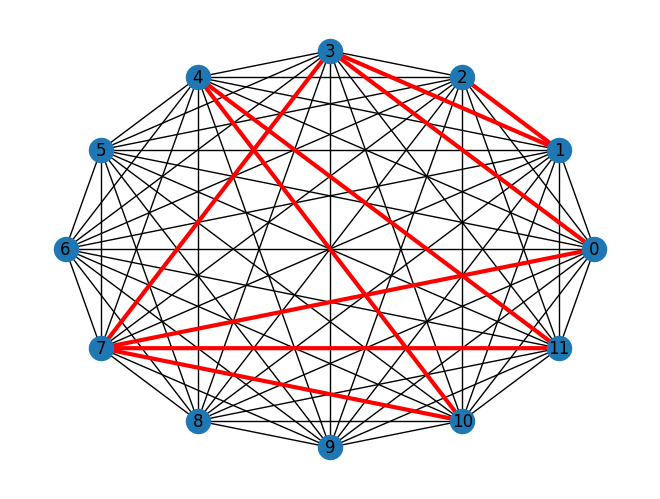

In [15]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, distance_map[i][j]))


edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[4][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K5 = nx.Graph()

for start, end, length in edges:
    K5.add_edge(start, end, length=length)


nx.draw_circular(K5, with_labels = True)
nx.draw_networkx_edges(K5, nx.circular_layout(K5), edgelist=edges_res, edge_color='r', arrows=True, width=3)


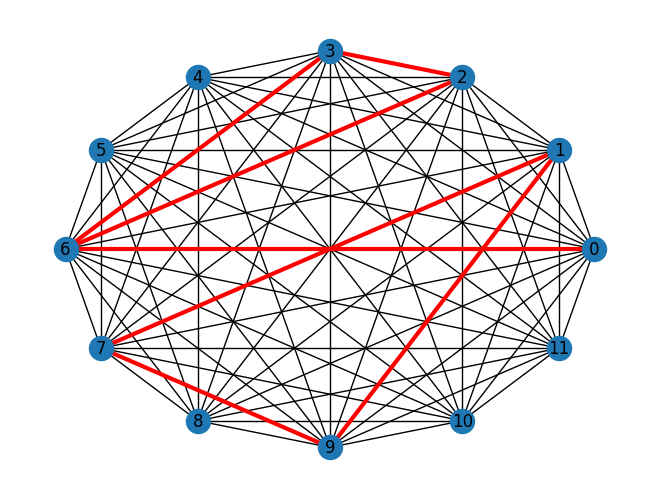

In [16]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[5][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K6 = nx.Graph()

for start, end, length in edges:
    K6.add_edge(start, end, length=length)


nx.draw_circular(K6, with_labels = True)
nx.draw_networkx_edges(K6, nx.circular_layout(K6), edgelist=edges_res, edge_color='r', arrows=True, width=3)


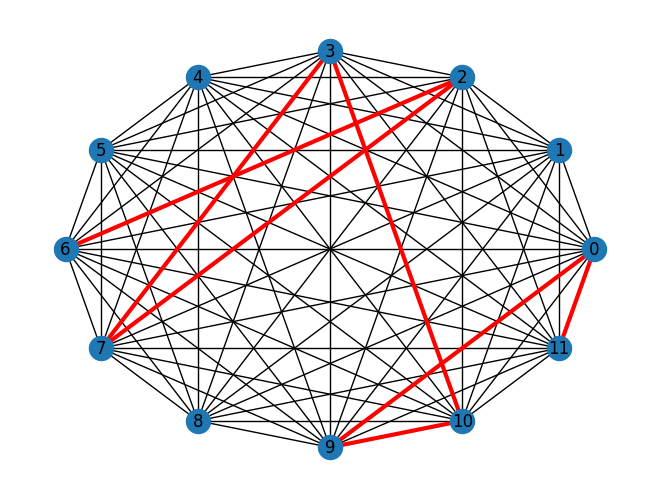

In [17]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and results[6][i][j] > 0.01:
            edges_res.append((i, j, results[0][i][j]))


K7 = nx.Graph()

for start, end, length in edges:
    K7.add_edge(start, end, length=length)


nx.draw_circular(K7, with_labels = True)
nx.draw_networkx_edges(K7, nx.circular_layout(K7), edgelist=edges_res, edge_color='r', arrows=True, width=3)
